## Moroccan IT PFE 2020 Analysis

This work was done by Kaygi22 <br/>
Data was gathered by: GI3 ENSA Al Hoceima <br/>
Feel free to share, copy, and modify the source code. 

In [12]:
import pandas as pd
import csv
import os
import re   
import nltk
from nltk.corpus import stopwords

#If you don't have stopwords and punkt from nltk, run these commands from the console or from jupyter
"""nltk.download('stopwords')
nltk.download('punkt')"""

In [13]:
#Loading data
it_data = pd.read_csv("data/QueryResults.csv")
#We drop the column count, because we won't use it 
it_data = it_data.drop('Count', 1)
#To imprive the efficiency of the result, we only chose the first 2000 frequent technolgy in stackoverflow
#Because some normal words can be considered as technologies like focus, la, this etc. 
it_data = it_data.head(2500)
#Because the majority of the offers are written in french words, we picked french stop words to eliminate 
#during our NLP treatment 
stopWords_fr = set(stopwords.words('french'))

In [14]:
#Check if a word is a technology
def check_word_technology(tech):
    word = get_cleaned_hashtags(tech)
    tech = tech.lower()
    if tech in it_data['TagName'].values:
        return True
    else:
        return False

#get the name of the company
#the only way to extract the name of the company, is from email contact
def extract_company_name(email):
    email = email.split('@')
    company_website = email[1].split('.')
    return company_website[0]

#get the list of all included emails in the offer
def get_emails_list(text):
    return re.findall('\S+@\S+', text) 

#clean all hashtags
#Some texts contain technologies as hashtags
def get_cleaned_hashtags(text):
    hashtags = re.findall('#\S+', text)
    cleaned = []
    for hashtag in hashtags:
        curr = hashtag[1:]
        cleaned.append(curr)
    return cleaned

def contains_word(s, w):
    return f' {w} ' in f' {s} '

In [15]:
print("-------------Technologies\n")
technologies = set()        
for word in it_data['TagName'].values:
    if contains_word(annonce, word):
        technologies.add(word)

print(technologies)

   
print("\n--------------company: \n")
emails = get_emails_list(annonce)
emails = get_emails_list(annonce)
for email in emails:
    print(extract_company_name(email))

-------------Technologies



NameError: name 'annonce' is not defined

## Exploring the files

In [16]:
files = []
path = "offers"
for r, d, f in os.walk(path):
    for file in f:
            files.append(os.path.join(r, file))
len(files)

110

In [19]:
tech_comp = pd.DataFrame(columns=['Technology','Company'])


for file in files:
    f = open(file, "r", encoding="latin-1")
    annonce = f.read()
    
    #Extracting company names
    
    emails = get_emails_list(annonce)
    email_list = set()
    for email in emails:
        email_list.add(extract_company_name(email))
    
    
    if len(email_list) == 0:
        email = "Unknown"
    else:
        email_list = sorted(email_list)
        email = email_list[0]
        
        
    #Extracting Technologies - Removing punctuation - Removing French stopwrds considered as technologies
    
    annonce = annonce.lower()
    tokens = nltk.word_tokenize(annonce)
    annonce = re.sub(r'[^\w\s]','',annonce)
    technologies = set()        
    for word in it_data['TagName'].values:
        if word not in stopWords_fr and contains_word(annonce, word):
            technologies.add(word)
            
    for techno in technologies:
        #print(email, techno)
        tech_comp = tech_comp.append({'Technology': techno,'Company':email}, ignore_index=True)



,Technology,Company
0,sap,accenture
1,devops,accenture
2,oracle,accenture
3,blockchain,accenture
4,cloud,accenture
...,...,...
445,java,Unknown
446,stack,rh-value
447,jee,rh-value
448,java,rh-value


In [22]:
company_emails = []
for file in files:
    f = open(file, "r", encoding="latin-1")
    annonce = f.read()
    emails = get_emails_list(annonce)
    email_list = set()
    for email in emails:
        email_list.add(extract_company_name(email))
    sorted(email_list)
    company_emails.append(email_list)
    
for lst in company_emails:
    sorted(lst)
    if len(lst) == 2:
        lst = sorted(lst)
        #print(lst[0])

confidentiel
smarteez
sgats


In [27]:
tech_comp[tech_comp['Company'] == 'Unknown'].count

<bound method DataFrame.count of            Technology  Company
12    computer vision  Unknown
13   machine learning  Unknown
14     transformation  Unknown
18                php  Unknown
19              excel  Unknown
..                ...      ...
429           service  Unknown
430              chef  Unknown
431               crm  Unknown
444               php  Unknown
445              java  Unknown

[73 rows x 2 columns]>

## Plotting results

In [ ]:

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.CONTENT: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [62]:
sr = tech_comp['Technology'].value_counts()
tech_occurences = sr.to_frame()
keys = []
values = []
for index, row in tech_occurences.iterrows():
    print(row['Technology'])
    keys.append(index)
    values.append(row['Technology'])
#We create our dictionary for ploting word cloud    
dic = dict(zip(keys, values))

22
21
14
12
12
11
11
10
9
8
8
8
7
7
7
7
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [66]:
from wordcloud import WordCloud

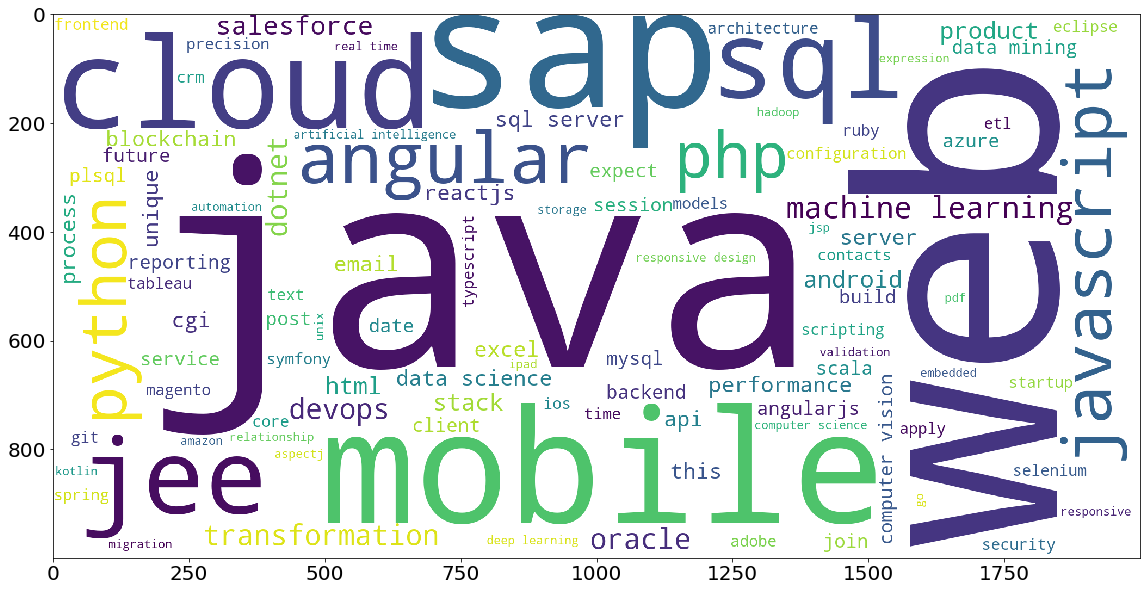

In [114]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

wc = WordCloud(background_color="white",
               width=2000,
               height=1000, 
               max_words=100,
               relative_scaling=0.5,
               normalize_plurals=False,
              ).generate_from_frequencies(dic)
#wc.random_color_func()
plt.figure( figsize=(20,10) )
plt.imshow(wc)

java
22
sap
14
sql
11
jee
11
angular
10
javascript
9
python
8
php
8
machine learning
8
oracle
7


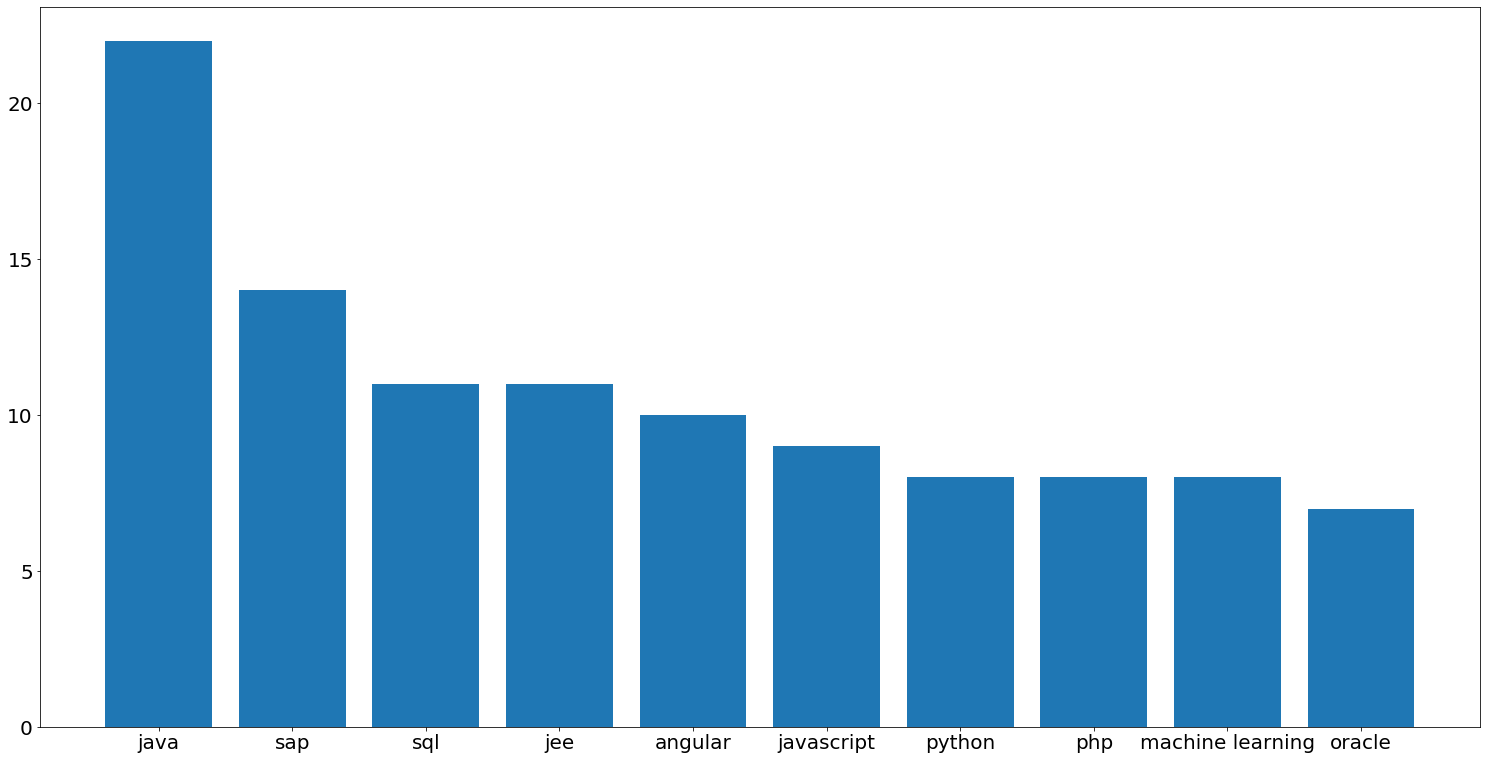

In [115]:
ignore = ['web','mobile','cloud', 'transformation', 'product', 'unique', 'email', 'performance', 'this']
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
p_techs = []
p_occurences = []


limit = 10
counter = 0
for key, value in dic.items():
    #print(key, value)
    if key not in ignore:
        #print(key)
        p_techs.append(key)
        #print(dic[key])
        p_occurences.append(dic[key])
        counter = counter+1
    if counter == limit:
        break    
#technolog = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
ax.bar(p_techs,p_occurences)
plt.show()


In [101]:
res = 0
for val in tech_occurences['Technology']:
    res = res + val
res

450

## Companies

In [122]:
tech_comp['Company'].count()
tech_occurences

,Technology
java,22
web,21
sap,14
mobile,12
cloud,12
...,...
key,1
odoo,1
distance,1
algorithm,1


In [131]:
tech_occurences[

java         22
web          21
sap          14
mobile       12
cloud        12
             ..
key           1
odoo          1
distance      1
algorithm     1
docker        1
Name: Technology, Length: 170, dtype: int64

In [149]:
tech_comp[tech_comp["Technology"] == "vue"]

,Technology,Company


In [162]:
for index, tech in tech_occurences.iterrows():
    print(index)

java
web
sap
mobile
cloud
sql
jee
angular
javascript
python
php
machine learning
transformation
oracle
devops
dotnet
salesforce
android
product
stack
html
unique
excel
data science
email
performance
blockchain
cgi
api
this
server
process
reactjs
sql server
angularjs
expect
computer vision
session
scala
date
reporting
client
future
build
post
azure
backend
service
mysql
plsql
join
data mining
scripting
tableau
typescript
magento
selenium
contacts
etl
eclipse
ruby
time
apply
crm
security
core
symfony
frontend
text
configuration
precision
models
git
architecture
spring
adobe
startup
ios
storage
go
responsive
ipad
aspectj
responsive design
hadoop
relationship
amazon
validation
automation
deep learning
pdf
migration
artificial intelligence
unix
real time
expression
kotlin
embedded
jsp
computer science
jdbc
statistics
model
laravel
project
module
github
cdi
highlight
flexbox
vba
elasticsearch
rest
facebook
ethereum
linux
plugins
css
ssis
spring mvc
frameworks
entity
microservices
transform
a

In [165]:
tech_comp[tech_comp["Technology"] == "reactjs"]

,Technology,Company
155,reactjs,atos
200,reactjs,atos
316,reactjs,sanadtech
347,reactjs,matious
